In [1]:
""" The Goal here is to Genarate a signal tabel. from the signal clmn
    which includes
    1. Genarate Sl
    2. Genarate Tp < hardCoded - Dinamic is comming in next version
 """

' The Goal here is to Genarate a signal tabel. from the signal clmn\n    which includes\n    1. Genarate Sl\n    2. Genarate Tp < hardCoded - Dinamic is comming in next version\n '

In [2]:
""" IMPORTING all"""

import mplfinance as mpf
import numpy as np
import pandas as pd

from resampler import EnterpriseDataResampler
from tafm import create_analyzer, IndicatorConfig
from ChartterX5 import Chartter

In [3]:
import pandas as pd

# Read the saved parquet file
ohlcv = pd.read_parquet("ohlcv-1M-mt5.parquet")


In [4]:
ohlcv = ohlcv.rename(columns={
    "tickvol": "vol"  # fix spelling too
})
ohlcv.head(3)


,open,high,low,close,vol,datetime
0,2064.593,2064.659,2063.809,2063.809,1,2024-01-01 23:05:00
1,2063.707,2063.937,2063.301,2063.770,1,2024-01-01 23:06:00
2,2063.714,2064.617,2063.714,2064.364,1,2024-01-01 23:07:00


In [5]:
resampler = EnterpriseDataResampler()

dta = resampler.resample_data(
        resampler.filter_business_data(
            resampler.date_filter.filter_by_date_range(
                ohlcv,
                start_date="2024-10-01",
                end_date="2024-10-02"
            ),
            business_hours_only=False,
            weekdays_only=True
        ),
        period="1T"
    ).set_index("datetime")

2025-09-26 11:54:24,903 - DataResampler - INFO - __init__:624 - EnterpriseDataResampler initialized successfully
2025-09-26 11:54:24,903 - INFO - EnterpriseDataResampler initialized successfully
2025-09-26 11:54:29,779 - DataResampler - INFO - filter_by_date_range:201 - Date filtering completed: 351641 -> 1378 rows (range: 2024-10-01 to 2024-10-02, time: 4.716s)
2025-09-26 11:54:29,779 - INFO - Date filtering completed: 351641 -> 1378 rows (range: 2024-10-01 to 2024-10-02, time: 4.716s)
2025-09-26 11:54:30,089 - DataResampler - INFO - filter_by_weekdays:276 - Weekday filtering: 1378 -> 1378 rows (days: Mon, Tue, Wed, Thu, Fri)
2025-09-26 11:54:30,089 - INFO - Weekday filtering: 1378 -> 1378 rows (days: Mon, Tue, Wed, Thu, Fri)
2025-09-26 11:54:30,860 - DataResampler - INFO - validate_dataframe:441 - Successfully validated DataFrame with 1378 rows
2025-09-26 11:54:30,860 - INFO - Successfully validated DataFrame with 1378 rows
2025-09-26 11:54:31,841 - DataResampler - INFO - resample_da

In [6]:
"""Applying tecNical Ananlisis.."""
dta = dta.rename(columns={
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "vol": "Volume"  # fix spelling too
})

analyzer = create_analyzer(dta)

analyzer.add_indicator(IndicatorConfig(name='RSI', period=14, source_column='Close'))
analyzer.add_indicator(IndicatorConfig(name='EMA', period=15, source_column='RSI_14'))


2025-09-26 11:54:33,004 - INFO - Loaded 161 TALib indicators
2025-09-26 11:54:33,013 - INFO - OHLCV validation: {'Open': True, 'High': True, 'Low': True, 'Close': True, 'Volume': True}
2025-09-26 11:54:33,106 - INFO - Initialized analyzer - Shape: (1378, 5), Memory: 0.06MB
2025-09-26 11:54:48,045 - INFO - ✓ Added indicator RSI_14 in 14.9326s
2025-09-26 11:54:48,378 - INFO - ✓ Added indicator EMA_15 in 0.2841s


In [7]:
#>=Signal Genarator

analyzer.crossed_up('RSI_14', 'EMA_15')

analyzer.df.tail(10)

2025-09-26 11:54:48,904 - INFO - ✓ RSI_14 crossed_up EMA_15 -> RSI_14_crossed_up_EMA_15 (0.0096s)


,Open,High,Low,Close,Volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15
datetime,,,,,,,,
2024-10-01 23:51:00,2660.494,2660.775,2660.455,2660.753,42,45.053087,44.207736,1
2024-10-01 23:52:00,2660.752,2660.947,2660.752,2660.851,30,47.201840,44.581999,0
2024-10-01 23:53:00,2660.853,2660.922,2660.560,2660.560,44,41.955208,44.253650,0
2024-10-01 23:54:00,2660.581,2660.800,2660.581,2660.637,48,43.737278,44.189104,0
2024-10-01 23:55:00,2660.643,2660.780,2660.484,2660.600,43,43.053267,44.047124,0
2024-10-01 23:56:00,2660.561,2660.595,2660.361,2660.539,47,41.890116,43.777498,0
2024-10-01 23:57:00,2660.497,2660.553,2660.353,2660.553,44,42.275570,43.589757,0
2024-10-01 23:58:00,2660.568,2660.682,2660.436,2660.508,48,41.326667,43.306871,0
2024-10-01 23:59:00,2660.514,2660.514,2660.359,2660.361,35,38.302220,42.681289,0


In [8]:
ohlcv = analyzer.df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"  # fix spelling too
})


In [9]:
import pandas as pd

# --- Define Forex sessions in UTC ---
sessions = {
    "Tokyo": ("00:00", "09:00"),
    "London": ("08:00", "17:00"),
    "New_York": ("13:00", "22:00"),
    "Sydney": ("22:00", "07:00")
}

# --- Function to filter a session ---
def get_session(df, start_time, end_time):
    times = df.index.time
    start = pd.to_datetime(start_time).time()
    end = pd.to_datetime(end_time).time()

    if start < end:
        return df.between_time(start_time, end_time)
    else:
        return df[(times >= start) | (times <= end)]

# --- Split OHLCV into sessions ---
session_dfs = {name: get_session(ohlcv, start, end) for name, (start, end) in sessions.items()}

# --- Extract signal times (RSI_14_above_EMA_15 == 1) ---
signal_times = ohlcv.index[ohlcv['RSI_14_crossed_up_EMA_15'] == 1]

# --- Access individual sessions ---
tokyo    = session_dfs["Tokyo"]
london   = session_dfs["London"]
new_york = session_dfs["New_York"]
sydney   = session_dfs["Sydney"]

# Optional: inspect
for name, df in session_dfs.items():
    print(f"{name} session: {len(df)} rows, signals: {df['RSI_14_crossed_up_EMA_15'].sum()}")

# --- Now signal_times can be passed to Chartter/ mplfinance vlines ---
# Example:
# chartter.plot(ohlcv, vlines={"tlines": signal_times.to_list(), "colors":"white", "linewidths":0.7, "linestyle":"--"})

tokyo


Tokyo session: 542 rows, signals: 56
London session: 541 rows, signals: 43
New_York session: 478 rows, signals: 33
Sydney session: 541 rows, signals: 58


,open,high,low,close,volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15
datetime,,,,,,,,
2024-10-01 00:00:00,2635.660,2635.899,2635.290,2635.519,89,NaN,NaN,0
2024-10-01 00:01:00,2635.535,2635.849,2635.463,2635.687,72,NaN,NaN,0
2024-10-01 00:02:00,2635.682,2636.025,2635.382,2635.975,86,NaN,NaN,0
2024-10-01 00:03:00,2635.977,2636.152,2635.616,2636.097,89,NaN,NaN,0
2024-10-01 00:04:00,2636.081,2636.200,2635.810,2636.052,72,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2024-10-01 08:57:00,2645.170,2645.727,2645.170,2645.727,72,67.524926,54.351506,0
2024-10-01 08:58:00,2645.683,2646.106,2645.683,2646.010,78,70.312994,56.346692,0
2024-10-01 08:59:00,2645.985,2646.660,2645.985,2646.535,98,74.659377,58.635778,0


In [10]:
# Filter rows where condition is true
signal_times = tokyo.index[tokyo['RSI_14_crossed_up_EMA_15'] == 1].to_list()


In [11]:
# Initialize chartter with wider and less tall proportions, no volume
chartter = Chartter(config={
    'chart_type': 'candle',
    'style': 'charles',
    'figratio': (20, 8),  # Adjusted for wider and less tall chart
    'volume': False  # Disable volume bars
})

# --- TradingView Market Colors ---
tv_mc = mpf.make_marketcolors(
    up='#26a69a',         # TradingView teal green for up candles
    down='#ef5350',       # TradingView red for down candles
    edge='inherit',       # Clean edges matching candle color
    wick='inherit',       # Wicks match candle colors
)

# --- TradingView Dark Theme ---
tradingview_dark = mpf.make_mpf_style(
    base_mpf_style='nightclouds',  # Start with dark base
    marketcolors=tv_mc,

    # TradingView dark theme colors
    figcolor='#131722',           # Dark navy background
    facecolor='#1e222d',          # Dark gray chart area
    gridcolor='#363a45',          # Dark gray grid
    gridstyle='-',                # Solid grid lines

    y_on_right=True,              # Price axis on right

    rc={
        # TradingView typography
        # 'font.family': ['-apple-system', 'BlinkMacSystemFont', 'Trebuchet MS', 'Roboto', 'Ubuntu', 'sans-serif'],
        'axes.labelsize': 10,
        'axes.titlesize': 14,
        'xtick.labelsize': 9,
        'ytick.labelsize': 7,         # Reduced size for price tick labels
        'legend.fontsize': 9,

        # Clean spacing with reduced left padding and full-width chart
        'axes.labelpad': 10,
        'xtick.major.pad': 6,
        'ytick.major.pad': 6,
        'axes.xmargin': 0,            # Remove left/right margins
        'axes.ymargin': 0,            # Remove top/bottom margins
        'figure.subplot.left': 0.05,  # Minimize left subplot padding
        'figure.subplot.right': 0.95, # Maximize right subplot to fit price scale

        # TradingView-style lines
        'lines.linewidth': 1.5,
        'lines.antialiased': True,

        # Clean borders and colors
        'axes.edgecolor': '#434651',  # Darker edge for dark theme
        'axes.linewidth': 1,
        'xtick.color': '#787b86',     # Light gray for x-axis ticks
        'ytick.color': '#787b86',     # Light gray for y-axis ticks
        'axes.labelcolor': 'none',    # Hide axis label color (labels are empty)

        # Grid styling
        'axes.grid': True,
        'axes.axisbelow': True,
        'grid.alpha': 0.6,            # Slightly more transparent for dark theme
        'grid.linewidth': 0.8,

        # Clean spines (show right spine for price scale)
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.spines.top': False,
        'axes.spines.right': True,    # Show right spine for price scale
        'ytick.right': True,          # Show right y-axis ticks
    }
)


2025-09-26 11:54:50,849 - INFO - Generating chart ee6998d6-df8b-44a5-a8e9-9ab7795fcad2 with 542 data points


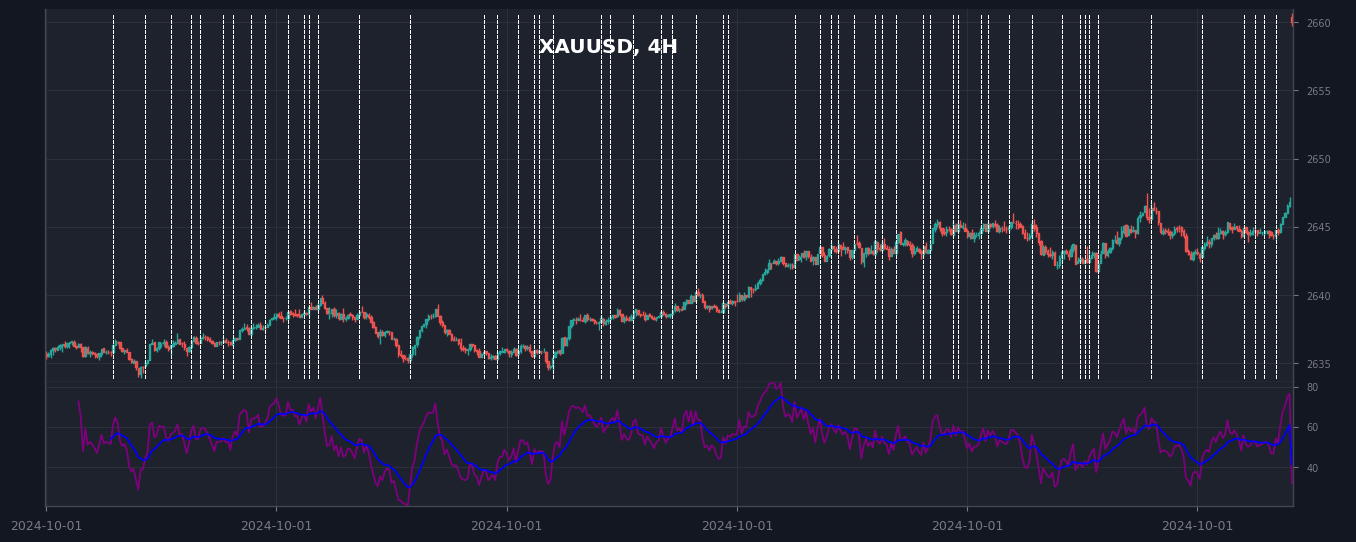

2025-09-26 11:54:57,348 - INFO - Chart ee6998d6-df8b-44a5-a8e9-9ab7795fcad2 generated successfully in 6.48s


In [12]:
# --- TradingView Configuration ---
tradingview_config_4H = {
    'title': 'XAUUSD, 4H',                # TradingView style title
    'style': tradingview_dark,             # Use dark theme
    'type': 'candle',
    'volume': False,                      # Disable volume bars
    'show_nontrading': False,             # Ensure no extra y-axis spacing
    'datetime_format': '%Y-%m-%d',        # Format x-axis to show date only
    'xlabel': '',                         # Remove x-axis label
    'ylabel': '',                         # Remove y-axis label
    'xrotation': 0                        # Horizontal date labels
}

chartter.plot(
    tokyo,
    addplot = [
        mpf.make_addplot(tokyo['RSI_14'], panel=1, color='purple', ylabel='RSI'),
        mpf.make_addplot(tokyo['EMA_15'], panel=1, color='blue', ylabel='ema15'),
    ],
    config=tradingview_config_4H,
    vlines=dict(
        vlines=signal_times,
        colors='white',
        linewidths=0.7,
        linestyle="--"
    )
)

In [13]:
tokyo.iloc[50:60]

,open,high,low,close,volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15
datetime,,,,,,,,
2024-10-01 00:50:00,2636.502,2636.506,2636.152,2636.506,66,59.899423,52.304220,0
2024-10-01 00:51:00,2636.457,2636.792,2636.270,2636.534,82,60.189863,53.289925,0
2024-10-01 00:52:00,2636.564,2636.702,2636.110,2636.202,75,55.094457,53.515492,0
2024-10-01 00:53:00,2636.181,2636.368,2635.917,2636.041,77,52.761817,53.421282,0
2024-10-01 00:54:00,2636.092,2636.312,2635.567,2636.312,87,56.128847,53.759728,1
2024-10-01 00:55:00,2636.292,2636.691,2636.156,2636.374,82,56.885992,54.150511,0
2024-10-01 00:56:00,2636.386,2636.604,2636.386,2636.467,55,58.055363,54.638617,0
2024-10-01 00:57:00,2636.510,2637.198,2636.510,2636.729,81,61.244482,55.464350,0
2024-10-01 00:58:00,2636.788,2636.788,2636.403,2636.425,63,55.930725,55.522647,0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

# Assume tokyo DataFrame is already defined and indexed by datetime

# Choose the candle to highlight
candle_time = pd.Timestamp("2024-10-01 08:58")
candle = tokyo.loc[candle_time]

# x = candle index, y = low price, height = high - low
x = tokyo.index.get_loc(candle_time)
y = candle['low']
height = candle['high'] - candle['low']

# Plot the close prices as a simple line
plt.plot(range(len(tokyo)), tokyo['close'], marker='o', color='blue')

# Add rectangle around the candle
plt.gca().add_patch(Rectangle(
    (x - 0.5, y),   # bottom-left corner
    1,              # width = 1 candle
    height,         # height = high - low
    facecolor='none',
    edgecolor='red',
    linewidth=2
))

# Set limits so rectangle is visible
plt.xlim(-1, len(tokyo))
plt.ylim(tokyo['low'].min() - 1, tokyo['high'].max() + 1)

plt.show()


KeyError: "None of ['datetime'] are in the columns"

In [14]:
from SetslX1 import calculate_multi_timeframe_atr_stop

settings = {
    'atr_periods': [7, 14, 21],      # Multiple ATR periods
    'atr_weights': [0.5, 0.3, 0.2],  # Weights for composite ATR
    'adaptive_multiplier': True,
    'rsi_period': 14,
    'momentum_threshold': 70
}

result = calculate_multi_timeframe_atr_stop(
    df=tokyo,
    settings=settings,
    position_type='short'
)

In [15]:
result.tail(3)

,open,high,low,close,volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15,composite_atr,atr,rsi,adx,trend_regime,adaptive_multiplier,entry_stop_loss,stop_distance_pct
datetime,,,,,,,,,,,,,,,,
2024-10-01 08:59:00,2645.985,2646.660,2645.985,2646.535,98,74.659377,58.635778,0,0.531091,0.531091,74.659377,15.012076,ranging,2.64,2659.767675,0.5
2024-10-01 09:00:00,2646.492,2647.150,2646.461,2646.808,79,76.579569,60.878752,0,0.547566,0.547566,76.579569,17.636472,ranging,2.64,2660.042040,0.5
2024-10-02 00:00:00,2660.390,2660.663,2659.699,2659.985,138,31.876259,41.330661,0,1.910007,1.910007,95.257887,22.807434,ranging,2.64,2673.284925,0.5


2025-09-26 11:55:07,104 - INFO - Generating chart 0914f097-ff96-4562-9d96-ef0a7809eb98 with 542 data points
2025-09-26 11:55:09,245 - INFO - Chart 0914f097-ff96-4562-9d96-ef0a7809eb98 generated successfully in 2.16s
/tmp/ipykernel_2249/2665115361.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


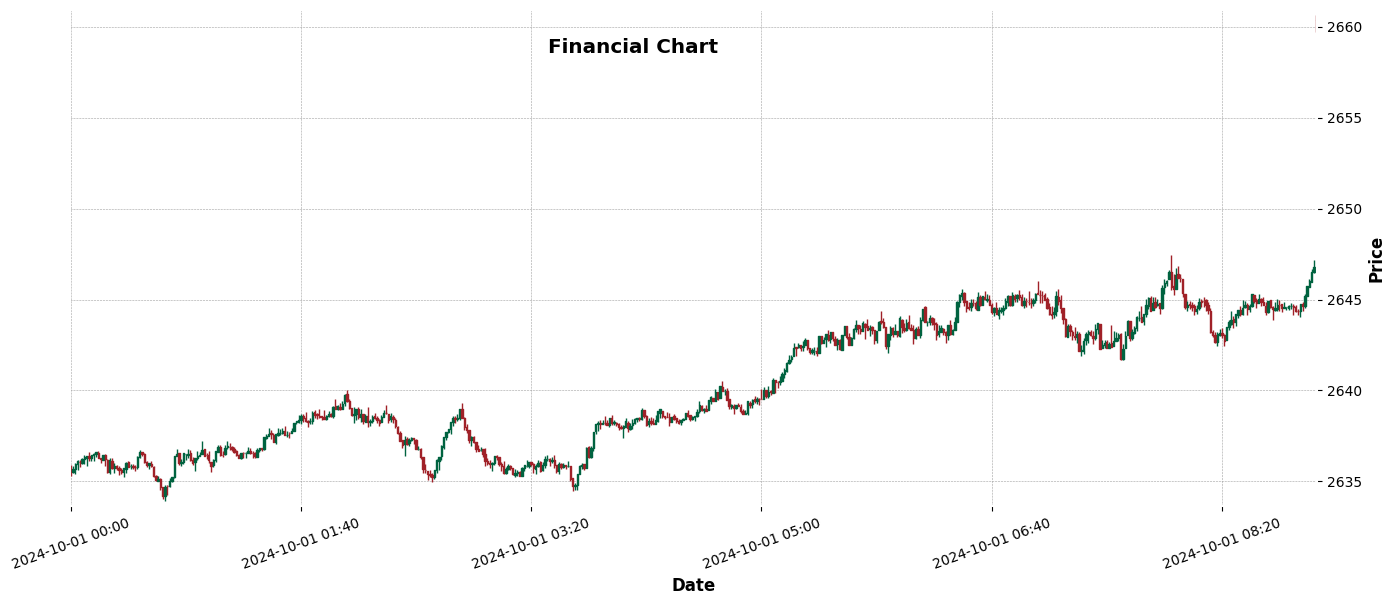

In [16]:
fig, ax = chartter.plot(tokyo, returnfig=True)

import matplotlib.patches as patches

start_date = pd.Timestamp('2024-10-01 09:30')
end_date   = pd.Timestamp('2024-10-01 11:00')
price_a    = 150
price_b    = 200

rect = patches.Rectangle(
    (start_date, price_a),
    end_date - start_date,
    price_b - price_a,
    color='orange',
    alpha=0.3
)
ax[0].add_patch(rect)

fig.show()